In [45]:
import os
import numpy as np
from PIL import Image, ImageFile
from skimage import io
import matplotlib.pyplot as plt
import tifffile
from scipy import misc
import pickle

In [63]:
with open('../depthEstimationNN1/inspections/output-gta.rick', 'rb') as f:
    gta_data = pickle.load(f)
in_images_gta, in_depths_gta, out_depths_images_gta, in_depths_images_gta, \
in_depths_bin_gta, out_depths_gta, depth_raw_gta, \
treshold_gt, mre_gt, rms_gt, rmls_gt, treshold, mre, rms, rmls = gta_data
in_image_orig_gta = np.array(Image.open('../depthEstimationNN1/inspections/output-gta-in-image.jpg'))
in_depth_orig_gta = np.array(Image.open('../depthEstimationNN1/inspections/output-gta-in-depth.png'))

with open('../depthEstimationNN1/inspections/output-nyu.rick', 'rb') as f:
    nyu_data = pickle.load(f)
in_images_nyu, in_depths_nyu, out_depths_images_nyu, in_depths_images_nyu, in_depths_bin_nyu, out_depths_nyu, depth_raw_nyu = nyu_data
in_image_orig_nyu = np.array(Image.open('../depthEstimationNN1/inspections/output-nyu-in-image.jpg'))
in_depth_orig_nyu = np.array(Image.open('../depthEstimationNN1/inspections/output-nyu-in-depth.png'))


In [64]:
print('BEFORE')
print('in_images_gta.shape: ', in_images_gta.shape)
print('in_depths_gta.shape: ', in_depths_gta.shape)

in_images_gta = in_images_gta[0, :, :, :].astype(np.uint8)
in_depths_gta = in_depths_gta[0, :, :, 0]
out_depths_images_gta = out_depths_images_gta[0, :, :, 0]

in_images_nyu = in_images_nyu[0, :, :, :].astype(np.uint8)
in_depths_nyu = in_depths_nyu[0, :, :, 0]

in_depths_bin_gta = in_depths_bin_gta[0, :, :, :]

in_depths_images_gta = in_depths_images_gta[0, :, :, 0]
in_depths_images_nyu = in_depths_images_nyu[0, :, :, 0]


BEFORE
in_images_gta.shape:  (1, 240, 320, 3)
in_depths_gta.shape:  (1, 120, 160, 1)


In [65]:
#print('in_image_orig_gta.shape: ', in_image_orig_gta.shape)
#print('in_depth_orig_gta.shape: ', in_depth_orig_gta.shape)
print('depth_raw_gta.shape: ', depth_raw_gta.shape)
print('in_depths_gta.shape: ', in_depths_gta.shape)
print('in_depths_images_gta.shape: ', in_depths_images_gta.shape)
print('in_depths_bin_gta.shape: ', in_depths_bin_gta.shape)
print('out_depths_images_gta.shape: ', out_depths_images_gta.shape)


print('AFTER')
print('in_images_gta.shape: ', in_images_gta.shape)
print('in_depths_gta.shape: ', in_depths_gta.shape)

in_image_orig_gta = in_image_orig_gta.astype(dtype=np.uint8)
in_image_orig_nyu = in_image_orig_nyu.astype(dtype=np.uint8)
depth_raw_gta = depth_raw_gta[:, :, 0]
depth_raw_nyu = depth_raw_nyu[:, :, 0]


depth_raw_gta.shape:  (1080, 1914, 1)
in_depths_gta.shape:  (120, 160)
in_depths_images_gta.shape:  (120, 160)
in_depths_bin_gta.shape:  (120, 160, 101)
out_depths_images_gta.shape:  (120, 160)
AFTER
in_images_gta.shape:  (240, 320, 3)
in_depths_gta.shape:  (120, 160)


### showing inputs

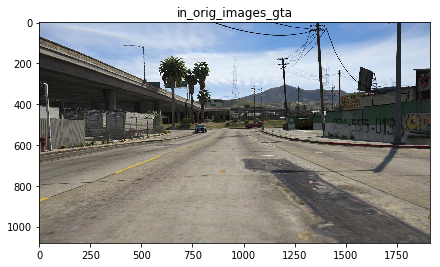

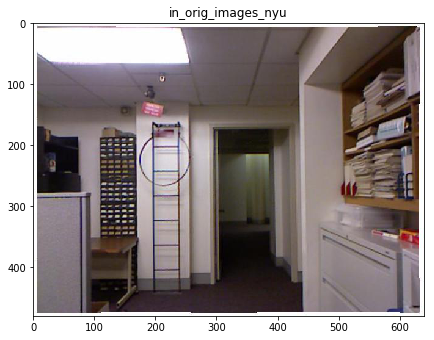

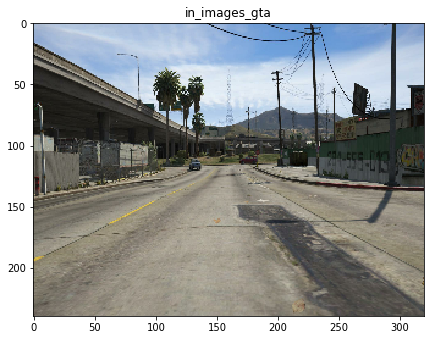

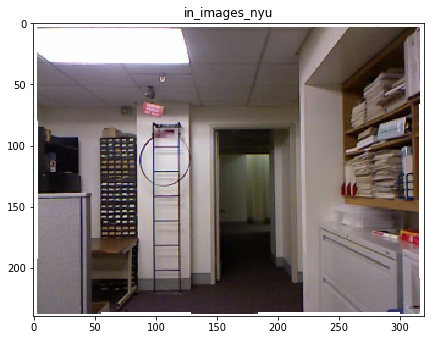

In [49]:
fig = plt.figure(figsize=(7, 7))
plt.title('in_orig_images_gta')
plt.imshow(in_image_orig_gta)

fig = plt.figure(figsize=(7, 7))
plt.title('in_orig_images_nyu')
plt.imshow(in_image_orig_nyu)

fig = plt.figure(figsize=(7, 7))
plt.title('in_images_gta')
plt.imshow(in_images_gta)

fig = plt.figure(figsize=(7, 7))
plt.title('in_images_nyu')
plt.imshow(in_images_nyu)

plt.show()

### showing input depths

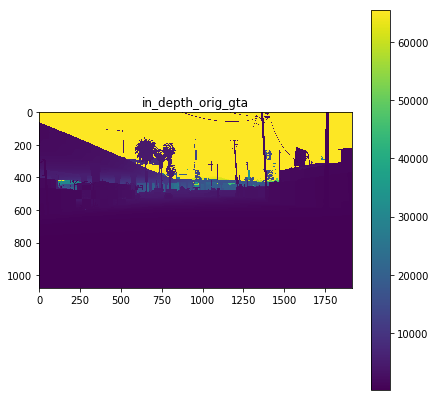

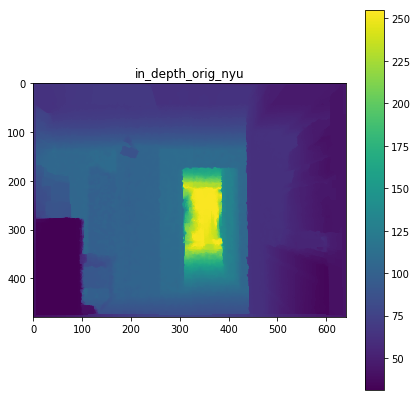

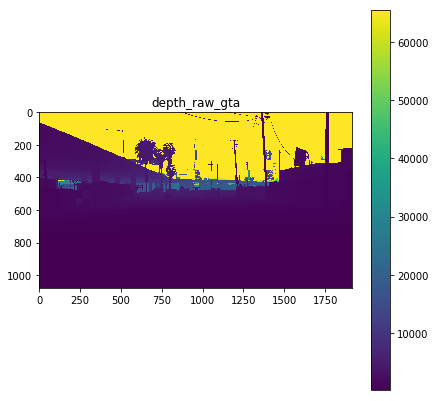

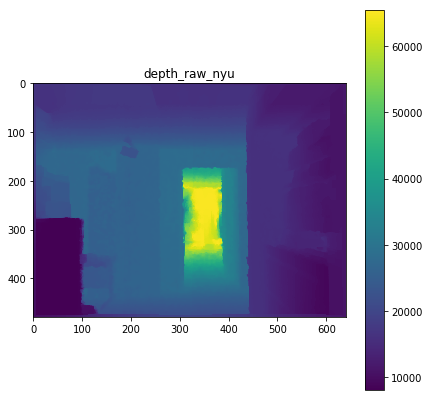

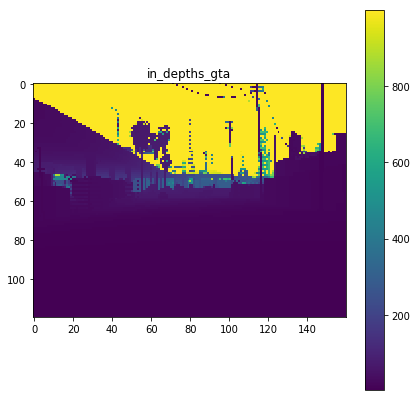

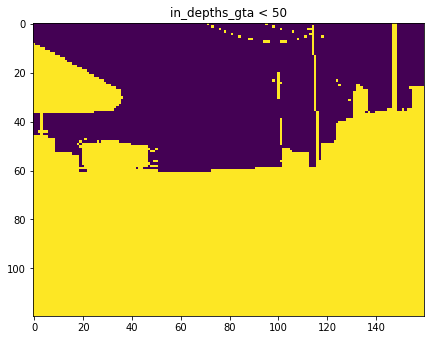

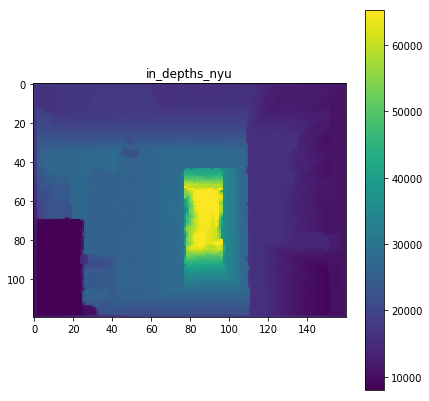

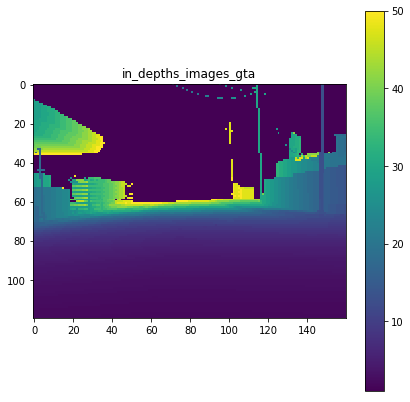

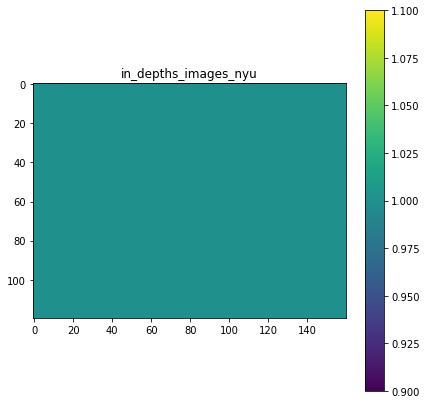

In [50]:
fig = plt.figure(figsize=(7, 7))
plt.title('in_depth_orig_gta')
ii = plt.imshow(in_depth_orig_gta)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('in_depth_orig_nyu')
ii = plt.imshow(in_depth_orig_nyu)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('depth_raw_gta')
ii = plt.imshow(depth_raw_gta)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('depth_raw_nyu')
ii = plt.imshow(depth_raw_nyu)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('in_depths_gta')
ii = plt.imshow(in_depths_gta)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('in_depths_gta < 50')
plt.imshow(in_depths_gta < 50)

fig = plt.figure(figsize=(7, 7))
plt.title('in_depths_nyu')
ii = plt.imshow(in_depths_nyu)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('in_depths_images_gta')
ii = plt.imshow(in_depths_images_gta)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('in_depths_images_nyu')
ii = plt.imshow(in_depths_images_nyu)
fig.colorbar(ii)
plt.show()

### showing images histograms

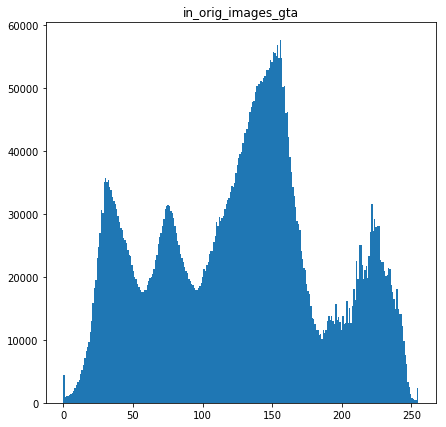

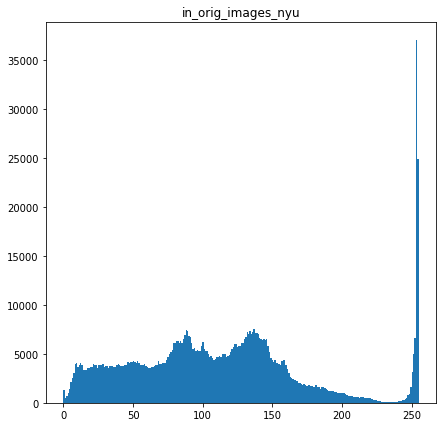

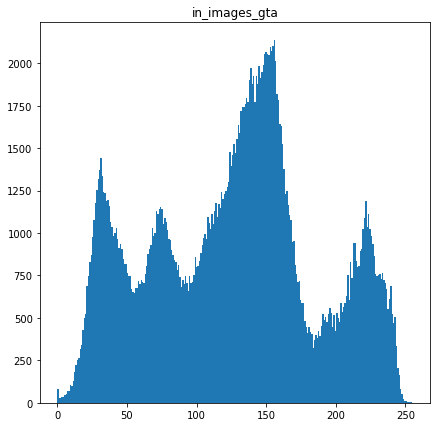

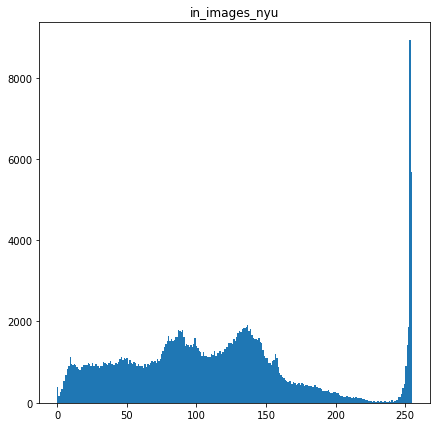

In [51]:
fig = plt.figure(figsize=(7, 7))
plt.title('in_orig_images_gta')
plt.hist(in_image_orig_gta.flatten(), 256)

fig = plt.figure(figsize=(7, 7))
plt.title('in_orig_images_nyu')
plt.hist(in_image_orig_nyu.flatten(), 256)

fig = plt.figure(figsize=(7, 7))
plt.title('in_images_gta')
plt.hist(in_images_gta.flatten(), 256)

fig = plt.figure(figsize=(7, 7))
plt.title('in_images_nyu')
plt.hist(in_images_nyu.flatten(), 256)

plt.show()


In [52]:
print(in_image_orig_gta[0, 0, :])
print(in_images_gta[0, 0, :])

print(in_image_orig_nyu[0, 0, :])
print(in_images_nyu[0, 0, :])

[168 182 209]
[167 181 207]
[251 255 255]
[251 255 255]


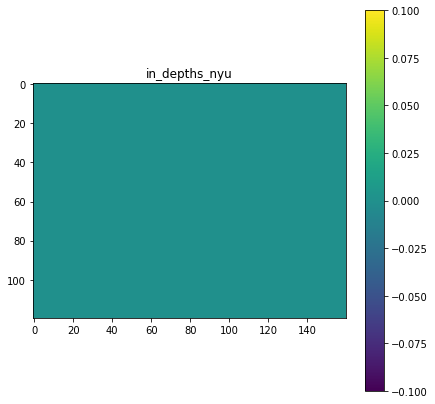

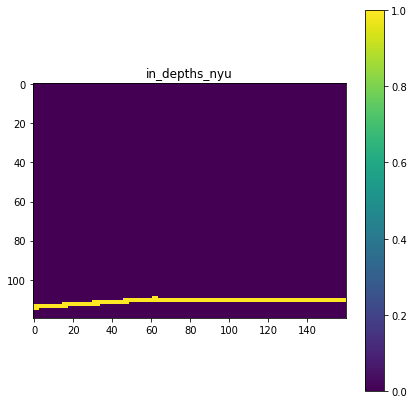

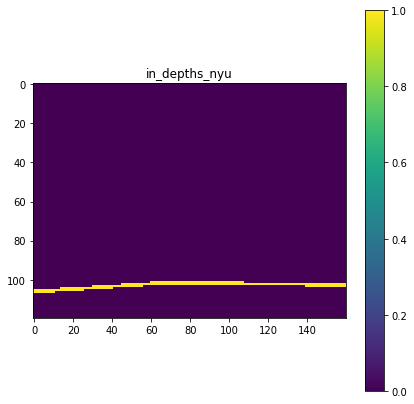

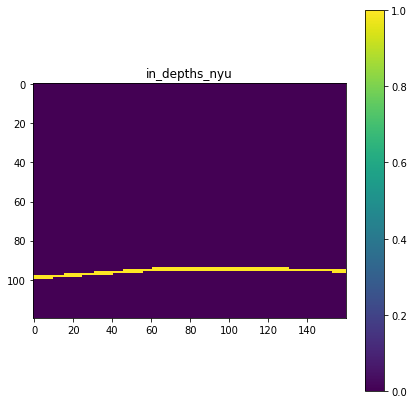

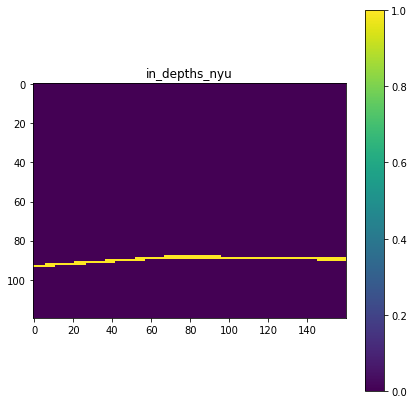

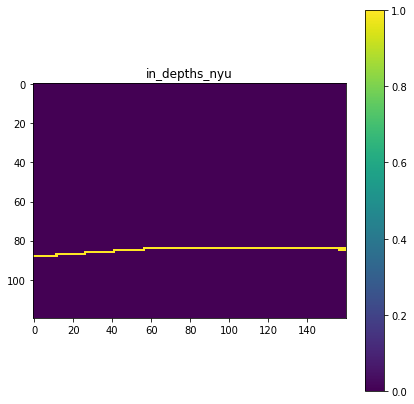

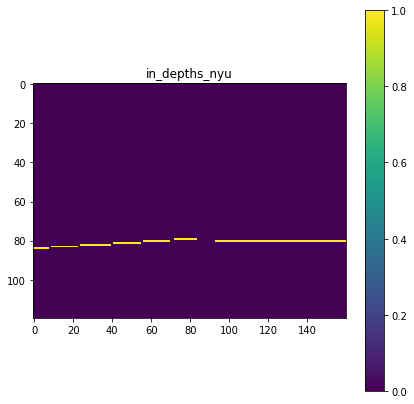

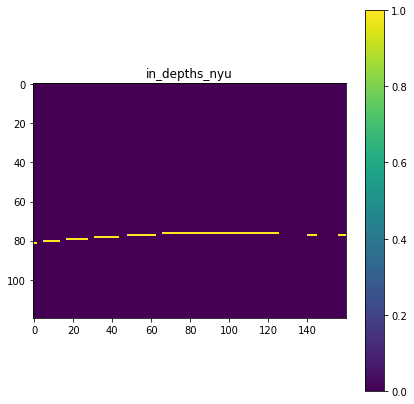

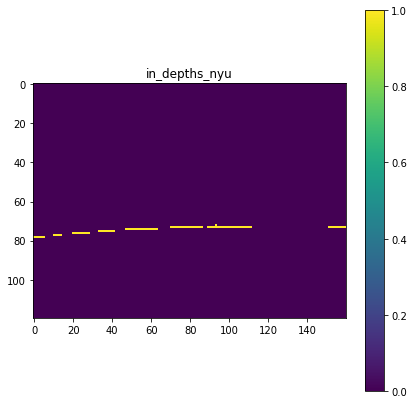

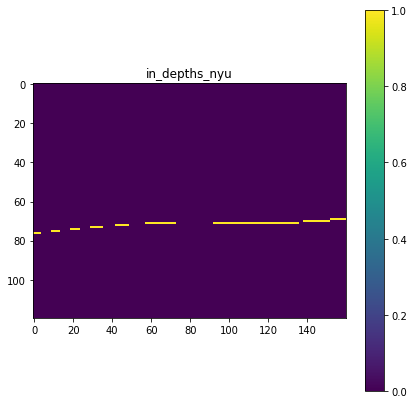

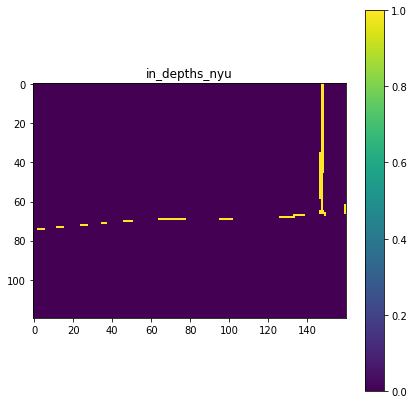

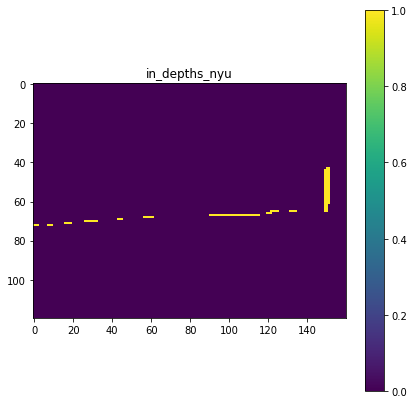

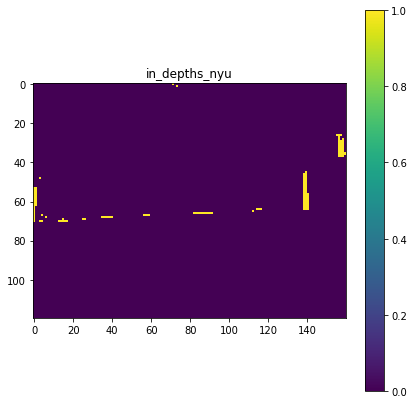

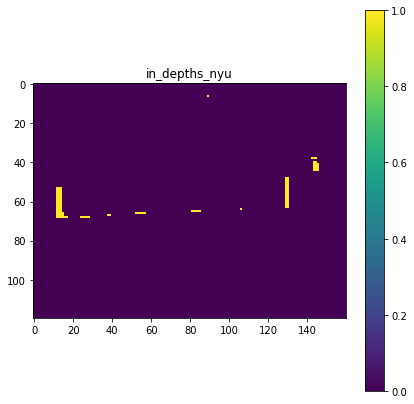

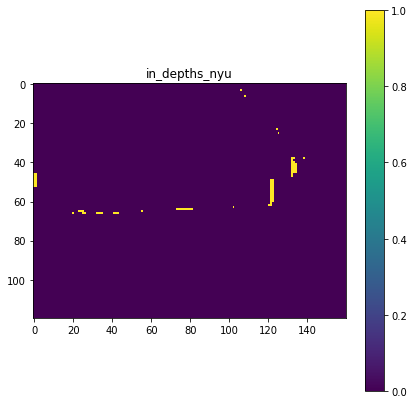

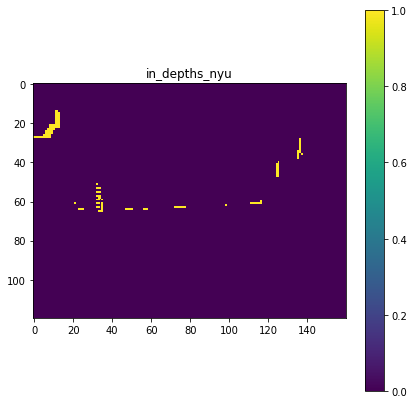

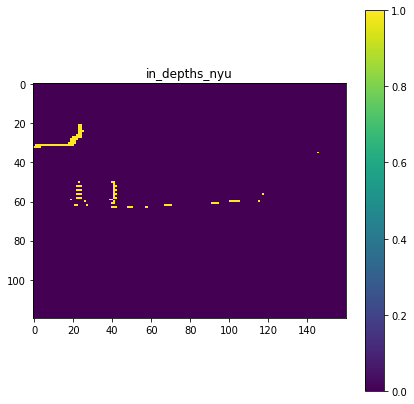

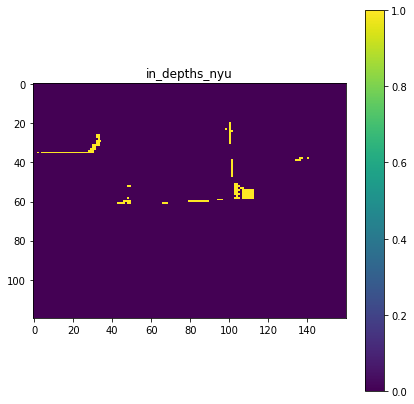

In [57]:
for i in range(30, in_depths_bin_gta.shape[2], 4):
    fig = plt.figure(figsize=(7, 7))
    plt.title('in_depths_nyu')
    ii = plt.imshow(in_depths_bin_gta[:, :, i])
    fig.colorbar(ii)

plt.show()

### showing depths data

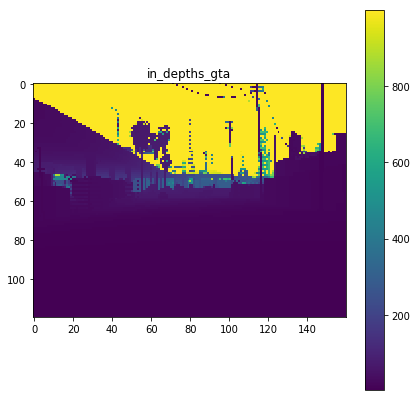

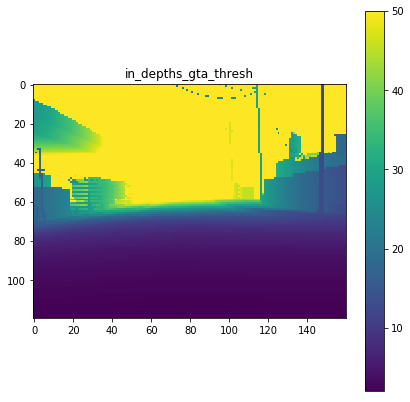

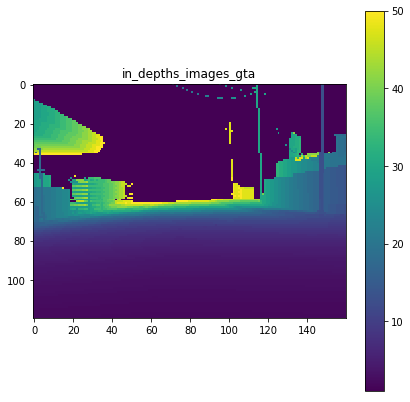

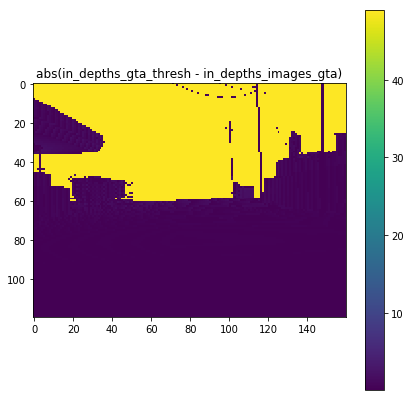

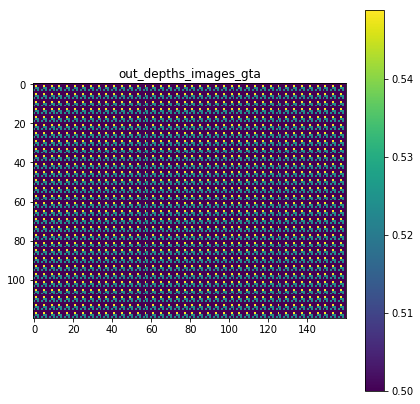

In [66]:
fig = plt.figure(figsize=(7, 7))
plt.title('in_depths_gta')
ii = plt.imshow(in_depths_gta)
fig.colorbar(ii)

in_depths_gta_thresh = np.copy(in_depths_gta)
in_depths_gta_thresh[in_depths_gta_thresh > 50] = 50

fig = plt.figure(figsize=(7, 7))
plt.title('in_depths_gta_thresh')
ii = plt.imshow(in_depths_gta_thresh)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('in_depths_images_gta')
ii = plt.imshow(in_depths_images_gta)
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('abs(in_depths_gta_thresh - in_depths_images_gta)')
ii = plt.imshow(abs(in_depths_gta_thresh - in_depths_images_gta))
fig.colorbar(ii)

fig = plt.figure(figsize=(7, 7))
plt.title('out_depths_images_gta')
ii = plt.imshow(out_depths_images_gta)
fig.colorbar(ii)


### showing preprocessing metrics

In [68]:
print('treshold_gt: ', treshold_gt)
print('mre_gt: ', mre_gt)
print('rms_gt: ', rms_gt)
print('rmls_gt: ', rmls_gt)
print()
print('treshold: ', treshold)
print('mre: ', mre)
print('rms: ', rms)
print('rmls: ', rmls)

treshold_gt:  5.0291667
mre_gt:  3.0787706
rms_gt:  1451.9274
rmls_gt:  4.749297

treshold:  0.0
mre:  0.7478657
rms:  13.602626
rmls:  1.0022736
